In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
b = 0.01870 # tasa de natalidad
d = 0.00789 # tasa de mortalidad
r = 0.01081 # tasa de reproducción
K = 10*10**9 # tasa de capacidad humana
alfa = 0.60 # tasa de infección humana
beta = 0.20 # tasa de erradicación de zombies
hzr0 = np.array([7.174*10**9, 1, 0])

In [3]:
def zombies(hzr, t, b, d, r, K, alfa, beta):
    H = hzr[0]
    Z = hzr[1]
    R = hzr[2]
    return np.array([
                        b*H - (d + (r/K)*H)*H - alfa*H*Z, 
                        alfa*H*Z - beta*H*Z + (1/2)*(d + (r/K)*H)*H, 
                        beta*H*Z + (1/2)*(d + (r/K)*H)*H
                    ])

In [4]:
t = np.linspace(0, 1e-8, 500)
p = odeint(zombies, hzr0, t, args=(b, d, r, K, alfa, beta))
H = p[:, 0]
Z = p[:, 1]
R = p[:, 2]

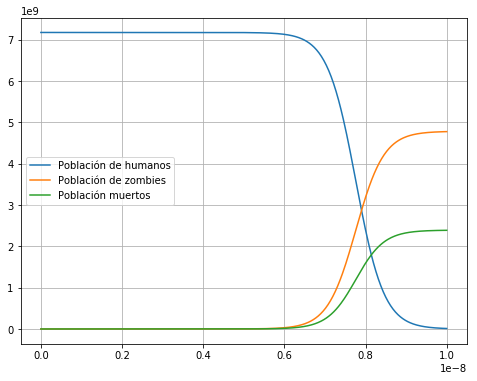

In [5]:
plt.figure(figsize=(8,6))
plt.plot(t, H, label="Población de humanos")
plt.plot(t, Z, label="Población de zombies")
plt.plot(t, R, label="Población muertos")
plt.grid()
plt.legend(loc="best")
plt.show()

In [6]:
def zombiesPunto(t = 0):
    t = np.linspace(0, t, 5)
    p = odeint(zombies, hzr0, t, args=(b, d, r, K, alfa, beta))
    H = p[:,0]
    Z = p[:,1]
    R = p[:,2]
    plt.figure(figsize=(8,6))
    plt.plot(t, H, label="Población de humanos")
    plt.plot(t, Z,label="Población de zombies")
    plt.plot(t, R, label="Población muertos")
    plt.grid()
    plt.legend(loc="best")
    plt.show()

In [7]:
interact_manual(zombiesPunto, t = (0, 5,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=5.0, step=0.01), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))